In [1]:
import dte_adj
from dte_adj.plot import plot
import numpy as np
import matplotlib.pyplot as plt

## Data setup

In [2]:
def generate_data(n, d_x=100, rho=0.5):
    """
    Generate data according to the described data generating process (DGP).

    Args:
    n (int): Number of samples.
    d_x (int): Number of covariates. Default is 100.
    rho (float): Success probability for the Bernoulli distribution. Default is 0.5.

    Returns:
    X (np.ndarray): Covariates matrix of shape (n, d_x).
    D (np.ndarray): Treatment variable array of shape (n,).
    Y (np.ndarray): Outcome variable array of shape (n,).
    """
    # Generate covariates X from a uniform distribution on (0, 1)
    X = np.random.uniform(0, 1, (n, d_x))
    
    # Generate treatment variable D from a Bernoulli distribution with success probability rho
    D = np.random.binomial(1, rho, n)
    
    # Define beta_j and gamma_j according to the problem statement
    beta = np.zeros(d_x)
    gamma = np.zeros(d_x)
    
    # Set the first 50 values of beta and gamma to 1
    beta[:50] = 1
    gamma[:50] = 1
    
    # Compute the outcome Y
    U = np.random.normal(0, 1, n)  # Error term
    linear_term = np.dot(X, beta)
    quadratic_term = np.dot(X**2, gamma)
    
    # Outcome equation
    Y = D + linear_term + quadratic_term + U
    
    return X, D, Y


n = 100  # Sample size
X, D, Y = generate_data(n)

# Display the first few rows of the generated data
print("X (covariates):\n", X[:5])
print("D (treatment):\n", D[:5])
print("Y (outcome):\n", Y[:5])

X (covariates):
 [[5.68698944e-01 6.96898989e-01 7.12641060e-01 2.86405324e-01
  4.91725290e-01 3.22017680e-01 9.64114466e-01 3.14637210e-01
  8.78482938e-01 3.74676437e-01 4.29265372e-01 1.50173236e-01
  2.15443648e-01 6.32137571e-01 7.30677430e-01 7.84562217e-02
  5.93485883e-02 2.93425358e-01 7.06881128e-01 6.58104315e-01
  1.37079660e-01 9.39211261e-01 8.76798333e-01 4.35452139e-01
  9.36449458e-01 7.54972663e-01 2.44851598e-01 4.53229156e-01
  9.18199457e-01 3.12338395e-01 9.16959651e-02 2.00667129e-01
  2.30713063e-01 7.35848441e-01 7.74882006e-01 3.14813491e-01
  6.00205999e-02 9.14213539e-01 8.62271530e-01 1.94349671e-01
  3.70488532e-01 7.66458555e-01 4.26250945e-01 7.22325161e-01
  1.06251900e-01 3.39087067e-01 3.16882938e-01 6.68198991e-01
  7.76653407e-01 5.59136481e-01 2.97751722e-01 4.56893399e-01
  3.79116277e-01 5.61692822e-01 6.54801889e-01 8.18735229e-02
  1.51727296e-01 7.13997337e-02 8.99918679e-01 5.19838482e-01
  4.61029310e-01 8.29734323e-01 7.34877238e-01 5.3846

## Simple Estimator

In [3]:
estimator = dte_adj.SimpleDistributionEstimator()

In [4]:
estimator.fit(X, D, Y)

<Axes: title={'center': 'DTE of simple estimator'}>

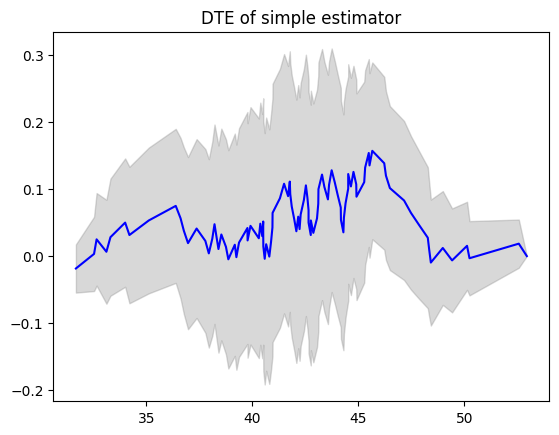

In [5]:
dte, lower_bound, upper_bound = estimator.predict_dte(target_treatment_arm=1, control_treatment_arm=0, locations=np.sort(Y), variance_type="simple")
plot(np.sort(Y), dte, lower_bound, upper_bound, title="DTE of simple estimator")

<Axes: title={'center': 'PTE of simple estimator'}>

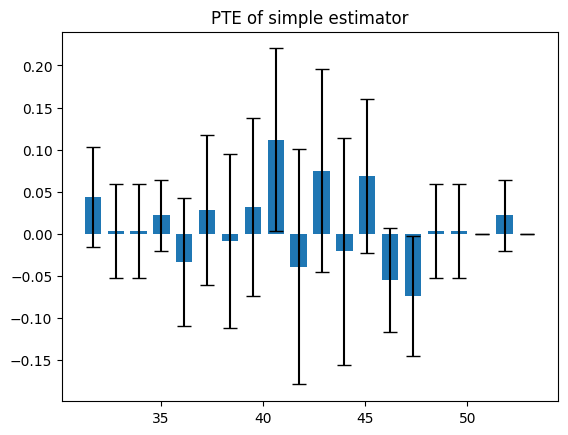

In [6]:
locations = np.linspace(Y.min(), Y.max(), 20)
pte, lower_bound, upper_bound = estimator.predict_pte(target_treatment_arm=1, control_treatment_arm=0, width=1, locations=locations)
plot(locations, pte, lower_bound, upper_bound, chart_type="bar", title="PTE of simple estimator")

<Axes: title={'center': 'QTE of simple estimator'}>

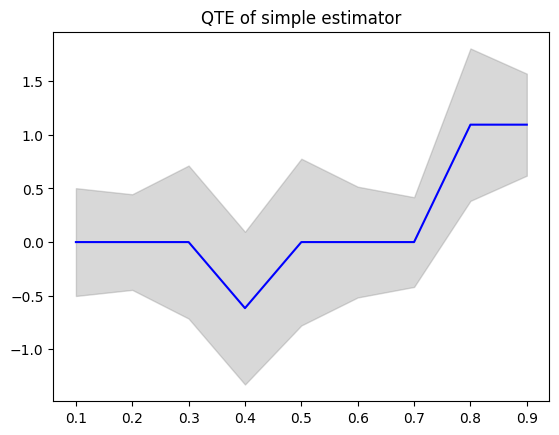

In [7]:
quantiles = np.array([0.1 * i for i in range(1, 10)], dtype=np.float32)
qte, lower_bound, upper_bound = estimator.predict_qte(target_treatment_arm=1, control_treatment_arm=0, quantiles=quantiles, n_bootstrap=30)
plot(quantiles, qte, lower_bound, upper_bound, title="QTE of simple estimator")

## Adjusted Estimator

In [8]:
from sklearn.linear_model import LogisticRegression

In [9]:
logit = LogisticRegression()

In [10]:
estimator = dte_adj.AdjustedDistributionEstimator(logit)

In [11]:
estimator.fit(X, D, Y)

<Axes: title={'center': 'DTE of adjusted estimator with simple confidence band'}>

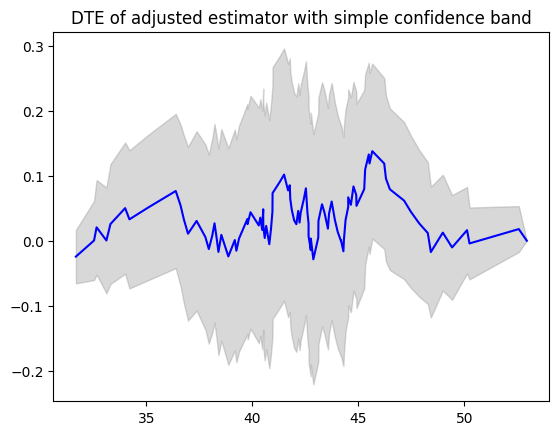

In [12]:
dte, lower_bound, upper_bound = estimator.predict_dte(target_treatment_arm=1, control_treatment_arm=0, locations=np.sort(Y), variance_type="simple")
plot(np.sort(Y), dte, lower_bound, upper_bound, title="DTE of adjusted estimator with simple confidence band")

<Axes: title={'center': 'DTE of adjusted estimator with moment confidence band'}>

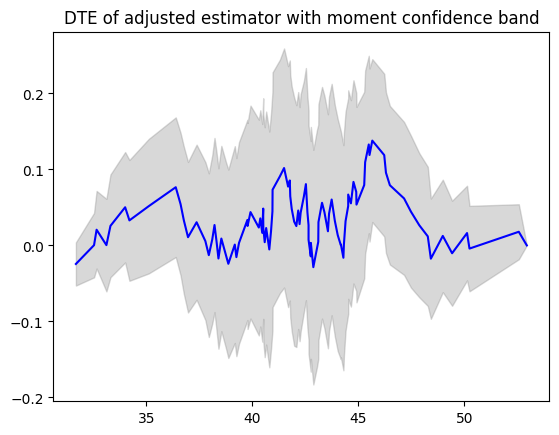

In [13]:
dte, lower_bound, upper_bound = estimator.predict_dte(target_treatment_arm=1, control_treatment_arm=0, locations=np.sort(Y), variance_type="moment")
plot(np.sort(Y), dte, lower_bound, upper_bound, title="DTE of adjusted estimator with moment confidence band")

<Axes: title={'center': 'DTE of adjusted estimator with uniform confidence band'}>

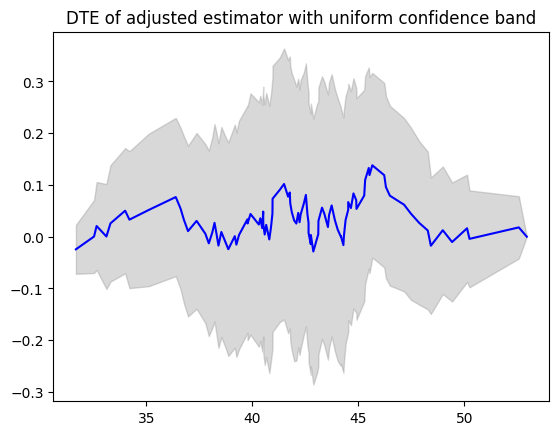

In [14]:
dte, lower_bound, upper_bound = estimator.predict_dte(target_treatment_arm=1, control_treatment_arm=0, locations=np.sort(Y), variance_type="uniform")
plot(np.sort(Y), dte, lower_bound, upper_bound, title="DTE of adjusted estimator with uniform confidence band")

<Axes: title={'center': 'PTE of adjusted estimator with simple confidence band'}>

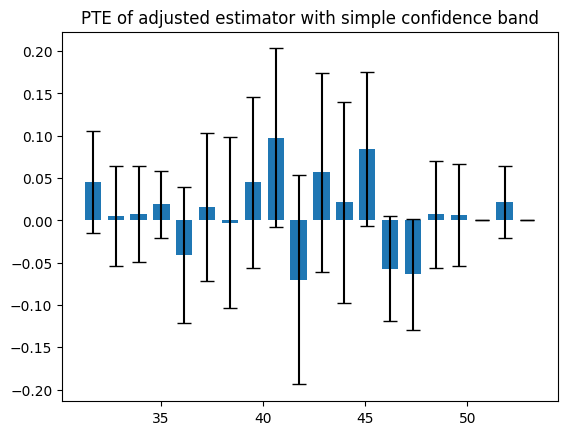

In [15]:
locations = np.linspace(Y.min(), Y.max(), 20)
pte, lower_bound, upper_bound = estimator.predict_pte(target_treatment_arm=1, control_treatment_arm=0, width=1, locations=locations, variance_type="simple")
plot(locations, pte, lower_bound, upper_bound, chart_type="bar", title="PTE of adjusted estimator with simple confidence band")

<Axes: title={'center': 'PTE of adjusted estimator with moment confidence band'}>

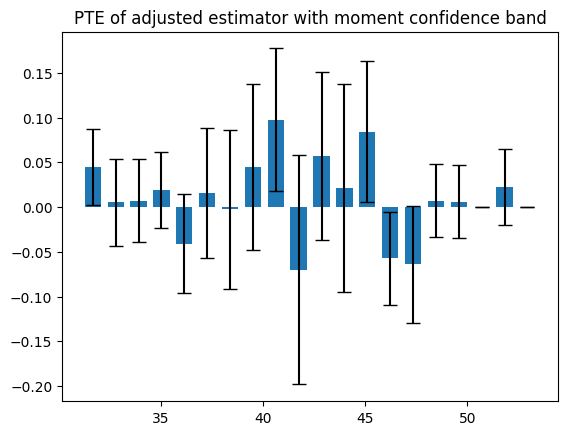

In [16]:
locations = np.linspace(Y.min(), Y.max(), 20)
pte, lower_bound, upper_bound = estimator.predict_pte(target_treatment_arm=1, control_treatment_arm=0, width=1, locations=locations, variance_type="moment")
plot(locations, pte, lower_bound, upper_bound, chart_type="bar", title="PTE of adjusted estimator with moment confidence band")

<Axes: title={'center': 'QTE of adjusted estimator'}>

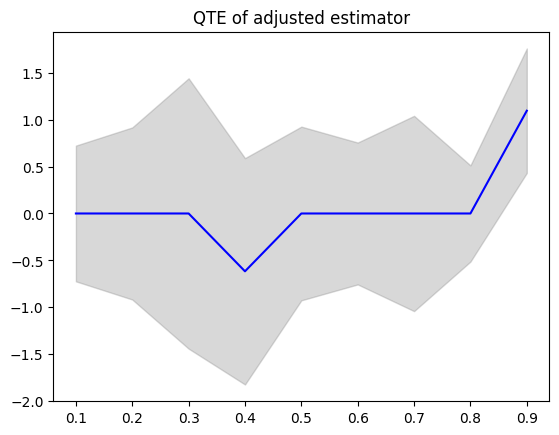

In [17]:
quantiles = np.array([0.1 * i for i in range(1, 10)], dtype=np.float32)
qte, lower_bound, upper_bound = estimator.predict_qte(target_treatment_arm=1, control_treatment_arm=0, quantiles=quantiles, n_bootstrap=30)
plot(quantiles, qte, lower_bound, upper_bound, title="QTE of adjusted estimator")